In [2]:
import autograd.numpy as np
from autograd import grad

# Define function
def f(x):
    return np.sin(x[0]) + x[0] * x[1]

# Get gradient function
grad_f = grad(f)

# Evaluate at a point
x = np.array([1.0, 2.0])
print("Gradient:", grad_f(x))  # Output: [cos(1.0) + 2.0, 1.0]

Gradient: [2.54030231 1.        ]


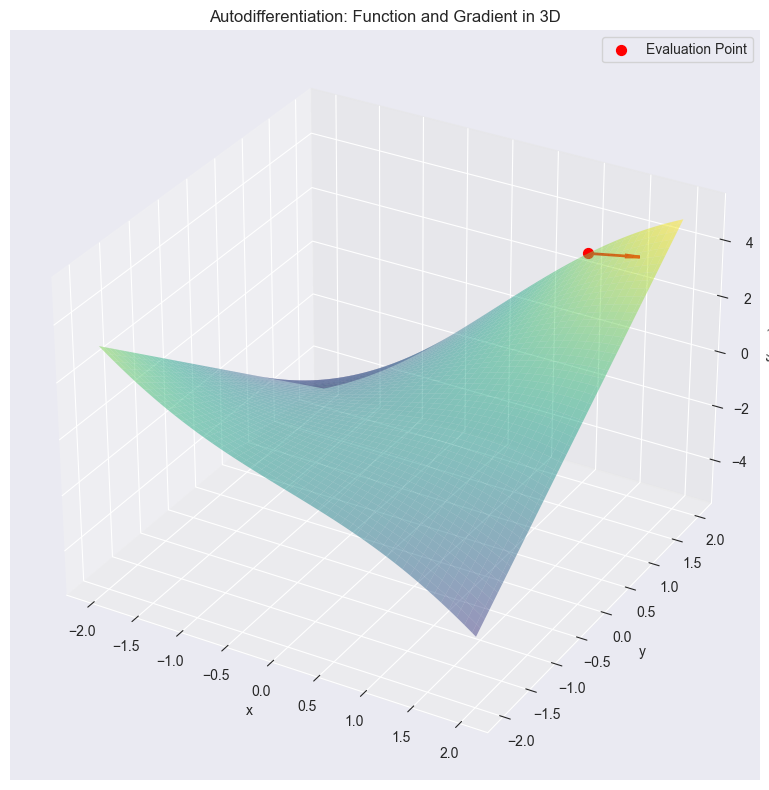

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a scalar function f(x, y)
def f(x, y):
    return np.sin(x) + x * y

# Create a 2D grid over the domain
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Choose an evaluation point
x0, y0 = 1.0, 2.0
z0 = f(x0, y0)

# Compute partial derivatives (gradient) at (x0, y0)
dfdx = np.cos(x0) + y0  # ∂f/∂x
dfdy = x0               # ∂f/∂y

# Set up 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the function surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5, edgecolor='none')

# Mark the evaluation point
ax.scatter(x0, y0, z0, color='red', s=50, label='Evaluation Point')

# Plot the gradient vector (quiver in x-y direction, flat in z)
ax.quiver(x0, y0, z0, dfdx, dfdy, 0, color='red', length=0.5, normalize=True, linewidth=2)

# Label the axes
ax.set_title('Autodifferentiation: Function and Gradient in 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Autodiff applications
Applications of autodiff include:

<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
C:\Users\keret\AppData\Local\Temp\ipykernel_23392\2085051687.py:38: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title("Autodifferentiation Application:\n$f(x, y) = \sin(x) + x y$")


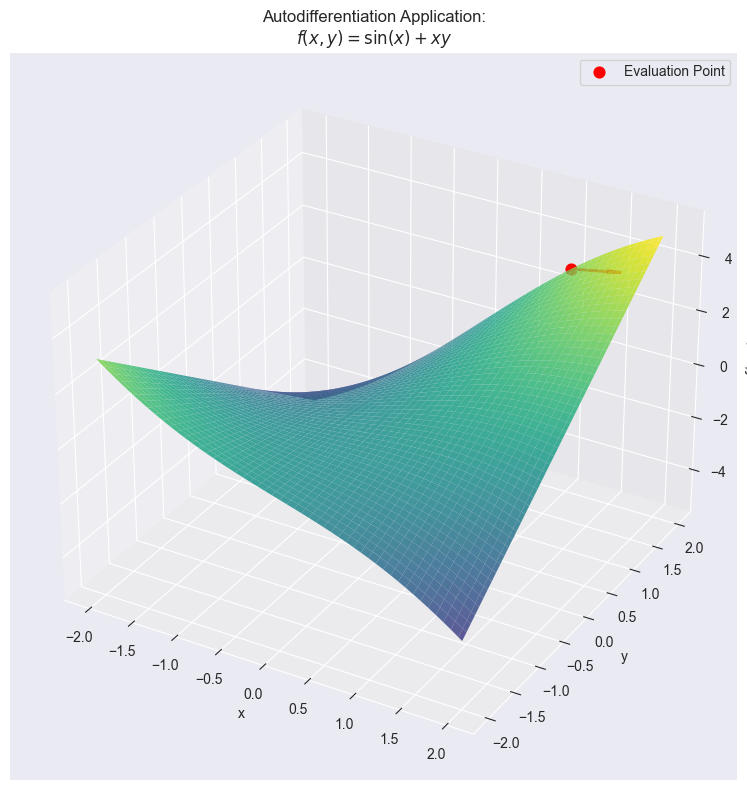

In [6]:
from autograd import grad
import autograd.numpy as anp
# Define function to differentiate
def f(x):
    return anp.sin(x[0]) + x[0] * x[1]

# Get gradient function using autodiff
grad_f = grad(f)

# Evaluation point
x0 = anp.array([1.0, 2.0])
g = grad_f(x0)

# Compute value at point
z0 = f(x0)

# Meshgrid for surface
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + X * Y

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the function surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.85, edgecolor='none')

# Mark evaluation point and gradient
ax.scatter(x0[0], x0[1], z0, color='red', s=60, label='Evaluation Point')
ax.quiver(x0[0], x0[1], z0, g[0], g[1], 0, color='red', length=0.5, normalize=True, linewidth=2)

# Axis labels and title
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.set_title("Autodifferentiation Application:\n$f(x, y) = \sin(x) + x y$")
ax.legend()

plt.tight_layout()
plt.show()

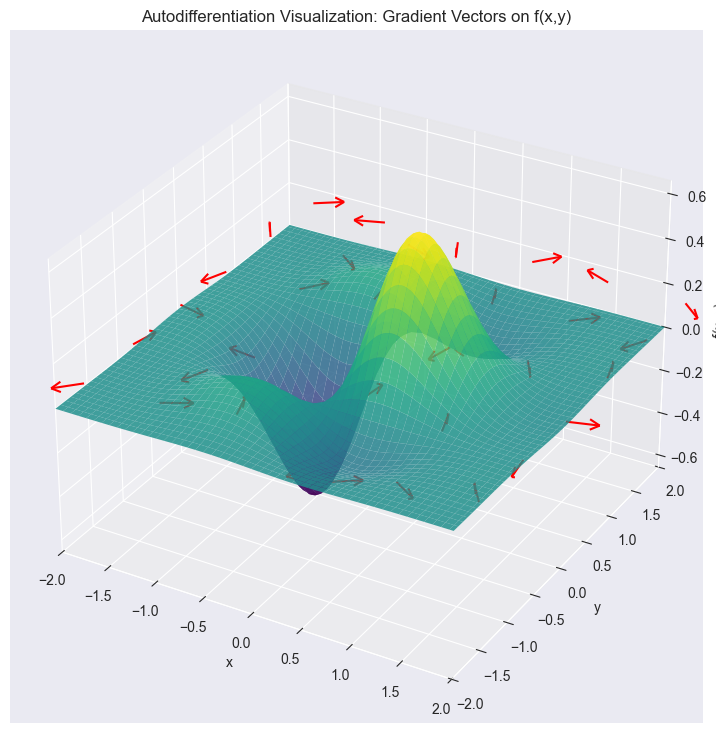

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

# Define the scalar function for visualization
def f(x, y):
    return np.exp(-x**2 - y**2) * np.sin(2*x) * np.cos(2*y)

# Define its gradient (computed manually)
def grad_f(x, y):
    common = np.exp(-x**2 - y**2)
    dfdx = common * np.cos(2*y) * (2*np.cos(2*x) - 2*x*np.sin(2*x))
    dfdy = -2 * common * np.sin(2*x) * (y*np.cos(2*y) + np.sin(2*y))
    return dfdx, dfdy

# Create a fine grid for the function surface
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Create a coarse base grid for evaluating gradients (e.g., 6x6 points)
base_x = np.linspace(-2, 2, 6)
base_y = np.linspace(-2, 2, 6)
BaseX, BaseY = np.meshgrid(base_x, base_y)

# Amplitude for shifting the evaluation grid over time
amplitude = 0.5

# Set up the 3D figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot the function surface (static)
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.85, edgecolor='none')

# Axis labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title("Autodifferentiation Visualization: Gradient Vectors on f(x,y)")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(np.min(Z), np.max(Z))

# Global variable to hold the quiver (gradient arrows)
q = None

# Number of animation frames
frames = 100

def update(frame):
    global q
    # Remove the previous quiver arrows
    if q is not None:
        q.remove()
    # Compute a time-dependent shift for the evaluation points
    shift_x = amplitude * np.sin(2*np.pi*frame/frames)
    shift_y = amplitude * np.cos(2*np.pi*frame/frames)
    # Update the evaluation grid by adding the shift
    X_eval = BaseX + shift_x
    Y_eval = BaseY + shift_y
    Z_eval = f(X_eval, Y_eval)
    # Compute gradient at these shifted points
    u, v = grad_f(X_eval, Y_eval)
    w = np.zeros_like(u)  # gradient is computed in the xy-plane
    # Plot the gradient vectors using quiver
    q = ax.quiver(X_eval, Y_eval, Z_eval, u, v, w, color='red', length=0.3, normalize=True)
    return q,

# Create the animation (update every 100 ms)
ani = animation.FuncAnimation(fig, update, frames=frames, interval=100, blit=False)

# Save the animation as a GIF (requires pillow)
ani.save("autodiff_gradient_animation.gif", writer="pillow", fps=20)

plt.show()